In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd
import matplotlib.pyplot as plt

Loading test and train data, tokenizing:

In [2]:
categories = ['alt.atheism', 'soc.religion.christian']
train_data = fetch_20newsgroups(subset='train', categories=categories, 
                                shuffle=True, random_state=1)
test_data = fetch_20newsgroups(subset='test', categories=categories, 
                                shuffle=True, random_state=1)
docs_test = test_data.data

# CountVectorizer uses bag of words
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data.data)
X_train_counts.shape


# Fit to tfidf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

Creating pipelines

In [37]:
nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())])

rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])

nn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MLPClassifier()),
])

Defining a handy scoring and printing function 

In [4]:
def score(y_true, y_pred):
    return {"accuracy_score": accuracy_score(y_true, y_pred), "precision_score": precision_score(y_true, y_pred), "recall_score":recall_score(y_true, y_pred), "f1_score":f1_score(y_true, y_pred)}

Naive Bayes Classifier

In [39]:
nb.fit(train_data.data, train_data.target)

predicted = nb.predict(docs_test)
nb_scores = score(predicted, test_data.target)
print(nb_scores)

{'accuracy_score': 0.8521617852161785, 'precision_score': 0.992462311557789, 'recall_score': 0.7931726907630522, 'f1_score': 0.8816964285714286}


SVM classifier

In [40]:
svm.fit(train_data.data, train_data.target)

predicted = svm.predict(docs_test)
svm_scores = score(predicted, test_data.target)
print(svm_scores)

{'accuracy_score': 0.9316596931659693, 'precision_score': 0.9874371859296482, 'recall_score': 0.8993135011441648, 'f1_score': 0.941317365269461}


MultiLayer Perceptron (Neural Network) classifier

In [41]:
nn.fit(train_data.data, train_data.target)

docs_test = test_data.data
predicted = nn.predict(docs_test)
nn_scores = score(predicted, test_data.target)
print(nn_scores)

{'accuracy_score': 0.9470013947001394, 'precision_score': 0.992462311557789, 'recall_score': 0.9186046511627907, 'f1_score': 0.9541062801932367}


RandomForest ensemble classifier

In [42]:
rf.fit(train_data.data, train_data.target)

docs_test = test_data.data
predicted = rf.predict(docs_test)
rf_scores = score(predicted, test_data.target)
print(rf_scores)

{'accuracy_score': 0.9121338912133892, 'precision_score': 0.9949748743718593, 'recall_score': 0.8665207877461707, 'f1_score': 0.9263157894736843}


Plotting Differences 

In [9]:
scores = [nb_scores, svm_scores, nn_scores, rf_scores]
f1s = [d['f1_score'] for d in scores]
models = ["NB", "SVM", "NN", "RF"]
df = pd.DataFrame.from_dict(scores).T
df.columns = models
df = df.T
df['model'] = models
df.reset_index()

,index,accuracy_score,precision_score,recall_score,f1_score,model
0,NB,0.852162,0.992462,0.793173,0.881696,NB
1,SVM,0.934449,0.987437,0.903448,0.943577,SVM
2,NN,0.949791,0.992462,0.922897,0.956416,NN
3,RF,0.902371,0.994975,0.853448,0.918794,RF


Text(0, 0.5, 'percent')

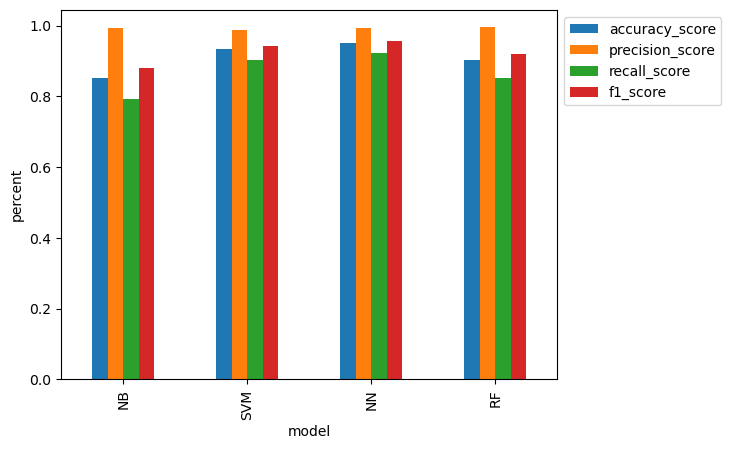

In [10]:
df.plot(x="model", y=["accuracy_score", "precision_score", "recall_score", "f1_score"], kind="bar")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel("percent")

Getting some output data for each model.

In [89]:
golden = ['God is love', 'God isn\'t real']  # some fake sentences that I consider to be "gold"
svm_preds = svm.predict(golden)
for i, g in enumerate(golden):
    print(f"{g} : {train_data.target_names[svm_preds[i]]}")

God is love : soc.religion.christian
God isn't real : soc.religion.christian


In [90]:
nn_preds = nn.predict(golden)
for i, g in enumerate(golden):
    print(f"{g} : {train_data.target_names[nn_preds[i]]}")

God is love : soc.religion.christian
God isn't real : alt.atheism


In [91]:
rf_preds = rf.predict(golden)
for i, g in enumerate(golden):
    print(f"{g} : {train_data.target_names[rf_preds[i]]}")

God is love : soc.religion.christian
God isn't real : soc.religion.christian


In [92]:
nb_preds = nb.predict(golden)
for i, g in enumerate(golden):
    print(f"{g} : {train_data.target_names[nb_preds[i]]}")

God is love : soc.religion.christian
God isn't real : soc.religion.christian


The nerual network was the only one that guessed correctly 